In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def lee_archivo(archivo):
	f = open(archivo, "r")
	contenido = f.read()
	f.close()

	lines = contenido.split("\n")
	n = int(lines[0])
	points = [ list(map(float, lines[i].split("\t")))  for i in range(1, len(lines)-1 )]

	return n, points

In [ ]:
# Calcula el angulo que 2 puntos forman
# usa math.atan() y math.degrees( )

def get_angle(p1, p2):
	resultado = math.atan2( p2[1]-p1[1], p2[0]-p1[0] )

	return math.degrees(resultado)


In [ ]:
#  0 =  son colineales
#  1 = p3 esta en el sentido del reloj
# -1 = p3 esta counterclockwise
def orientacion(A, B, C):
  x = 0
  y = 1
  resultado = (B[y]-A[y])*(C[x]-B[x])-(B[x]- A[x])*(C[y]-B[y])

  if resultado <= 0:
    return True
  else:
    return False


In [ ]:
def find_hull(n, puntos):
  # Obten el menor punto de acuerdo a la coordenada y
  # min(lista,  key = lambda param : returned_value  )
  lowest_point = min( puntos, key = lambda x: x[1] )

  # Obten el angulo de cada uno de los otros puntos
  # con respecto a lowest_point
  for i in range( n ):
    angulo = get_angle( lowest_point, puntos[i]) # aqui en realidad no importa quien es p1 o p2
    puntos[i].append(angulo)

  # ordena los puntos con respecto al angulo que forman con lowest_point
  puntos_sorted = sorted( puntos, key = lambda x: x[2] )
  print(puntos_sorted)
  # Agrega los tres primeros puntos(ordenados) en la stack
  # Spoiler: al final del proceso, los puntos elegidos se quedan en la stack
  stack = []
  stack.append( puntos_sorted[0] )
  stack.append( puntos_sorted[1] )
  stack.append( puntos_sorted[2] )

  # Para cada uno del resto de los puntos...
  for i in range (3, n):
    while len(stack) >= 2:
      ultimo = stack[-1]
      penultimo = stack[-2]

      convex = orientacion(penultimo, ultimo, puntos_sorted[i])

      if convex == False:
        stack.pop(-1)
      else:
        break

    stack.append( puntos_sorted[i] )

  return [stack, lowest_point]

    # Mientras la stack tenga 2 o mas puntos...
      # Revisa la orientacion del punto actual con respecto
      # a los dos ultimos puntos de la stack

      # Si la orientacion es clockwise, los tres puntos forman un angulo concavo
        # Asi que el ultimo punto de la stack no deberia ser parte de la hull
        # Remuevelo de la stack

      # Si la orietacion no es clockwise, no hace falta eliminar nada. Rompe el while

    # Fuera del while, agrega el punto actual a la stack

  # Al final del proceso, devuelve la stack y el punto lowest_point



In [ ]:
def draw_hull( puntos, elegidos, lowest, text):
	# Esto grafica todos los puntos con colores random, y semi-trasparentes
	colors = np.random.rand(n)
	plt.scatter([p[0] for p in puntos], [p[1] for p in puntos], c=colors, alpha=0.5)

	# Usa scatters similares para graficar los puntos elegidos y el lowest
	plt.scatter(lowest[0], lowest[1])

	plt.text(lowest[0], lowest[1], "lowest")


	# Usa plot para graficar el poligono
	elegidos.append(lowest)
	plt.plot([p[0] for p in elegidos], [p[1] for p in elegidos] )

	# text es el nombre de la instancia de prueba, agregado como texto a la grafica
	plt.title(text)

	plt.show()

[[2.408, -5.758, 0.0], [7.404, -0.906, 44.16226601295781], [3.991, 4.593, 81.30500618422475], [1.28, 1.179, 99.23582077418848], [-7.757, 5.6, 131.82739438505016], [-2.77, -0.026, 132.093068591252], [-7.401, 4.014, 135.10826522235206], [-3.99, -2.74, 154.74628374947346]]


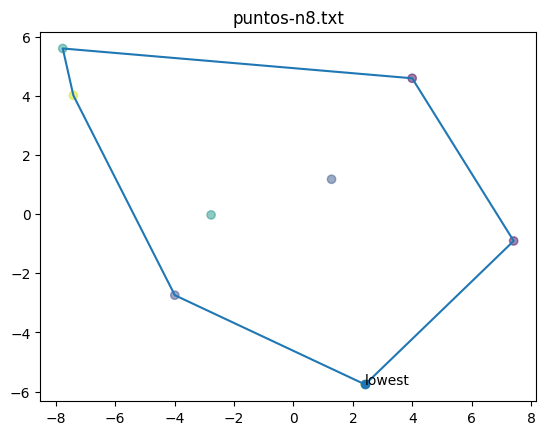

[[-2.423, -8.469, 0.0], [5.371, -5.404, 21.467293761195663], [6.766, -3.823, 26.82136745233779], [8.156, 6.039, 53.901071444696505], [2.615, 2.077, 64.46541620923038], [5.721, 9.354, 65.44255387788756], [4.129, 6.744, 66.69921492984524], [-0.822, 9.342, 84.86358565260004], [-7.121, 1.38, 115.50126999578816], [-8.101, 0.904, 121.20675036852121]]


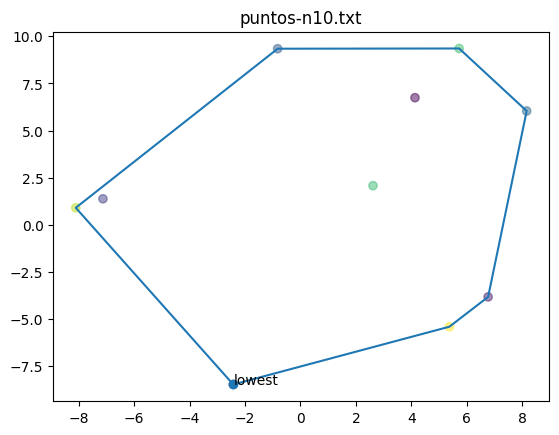

[[-4.939, -9.51, 0.0], [2.691, -7.592, 14.110428725796947], [6.216, -5.45, 19.999601042157703], [9.773, -3.284, 22.93769029450839], [8.552, -1.416, 30.961882835108522], [5.365, -2.61, 33.80795991004192], [7.44, -0.986, 34.55073480547394], [2.81, -4.122, 34.81148881013512], [3.787, 0.038, 47.575539247801295], [1.504, -0.743, 53.6872748442467], [-8.307, -3.583, 119.60727411450159]]


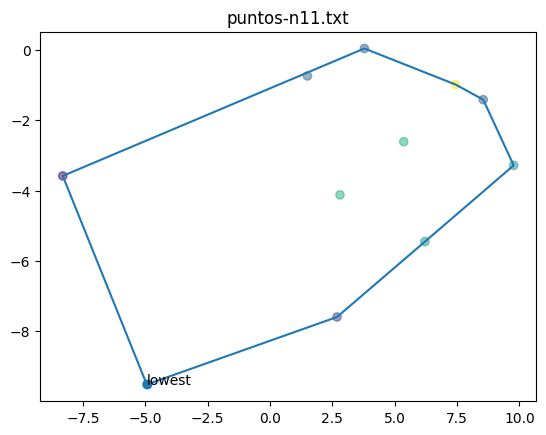

[[5.856, -13.304, 0.0], [8.831, -11.211, 35.12751367019921], [9.398, -0.608, 74.4116680928941], [11.206, 6.409, 74.81598035006967], [12.3, 12.707, 76.08562033521912], [11.606, 11.806, 77.10207641271943], [6.558, -10.207, 77.22852281729368], [4.759, -6.525, 99.19210639131845], [-0.369, 10.05, 104.92515634566858], [-13.349, 12.809, 126.33289911616461], [-10.655, 6.055, 130.46036302663197], [-6.427, 0.06, 132.58645850476816], [-12.444, -10.013, 169.80512451454635], [-12.7, -10.877, 172.54839649792697], [-12.792, -12.003, 176.0091580087011]]


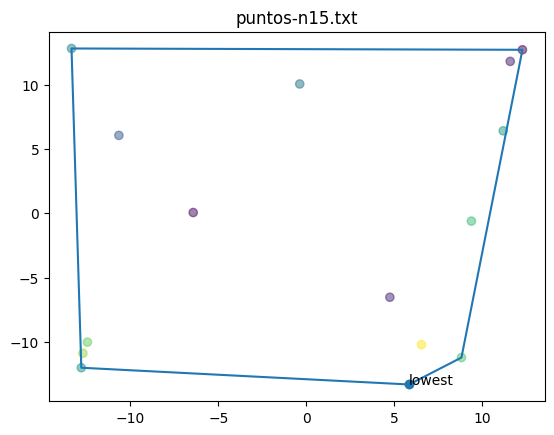

[[15.953, -15.042, 0.0], [15.751, 1.231, 90.71118743070613], [15.201, 13.637, 91.50202432085231], [11.34, 12.911, 99.37089161230129], [-3.813, 13.756, 124.46442293517653], [-11.025, 9.705, 137.46974778617536], [-3.684, 1.439, 139.9938356943356], [-15.181, 11.008, 140.0805798675509], [-6.512, -1.273, 148.49549405647616], [-10.538, -2.266, 154.2530558306196], [-14.224, -1.595, 155.98204323563596], [-10.883, -5.995, 161.36991807242669], [7.237, -12.707, 165.0027303344286], [-7.161, -9.772, 167.1560983023806], [-12.906, -9.84, 169.78183471138811], [-11.974, -14.098, 178.0640015076098]]


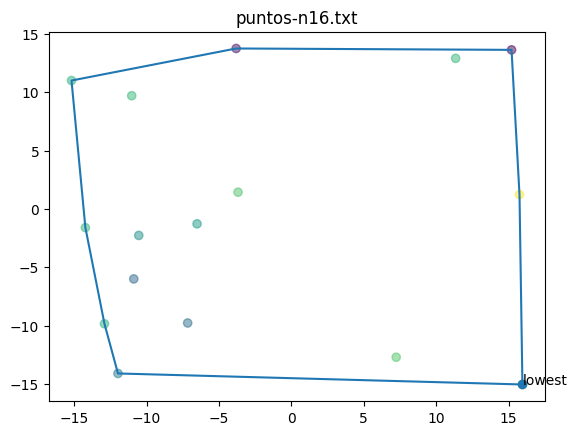

[[-5.084, -17.237, 0.0], [19.759, -14.866, 5.451759733365862], [12.742, -15.295, 6.217397116513675], [1.957, -15.703, 12.290784556775964], [9.465, -13.522, 14.324057225574153], [4.942, -5.79, 48.786092501288834], [7.606, -2.286, 49.67631344636525], [14.789, 10.899, 54.7657008124246], [0.974, -2.553, 67.58101822948962], [3.458, 6.054, 69.85943205162926], [-4.515, 5.232, 88.5493643589109], [-7.535, 16.486, 94.15696889690405], [-14.452, 17.516, 105.08604661354872], [-13.537, 1.083, 114.76899205922548], [-9.576, -10.465, 123.55709462455218], [-18.808, 0.094, 128.3748516221752], [-16.124, -4.214, 130.28897584193854], [-11.235, -11.74, 138.21361075602667], [-15.106, -15.459, 169.9398465798944], [-17.786, -15.884, 173.91985682023454]]


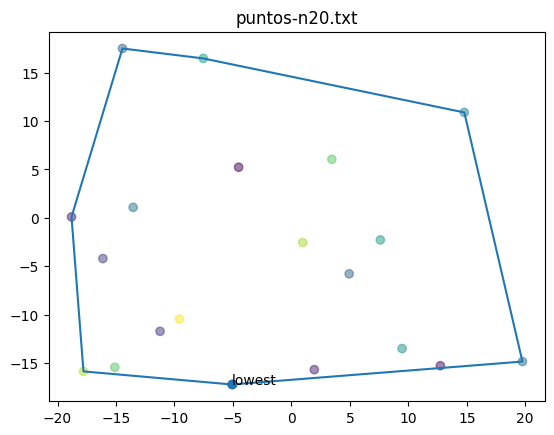

[[-8.093, -44.789, 0.0], [24.859, -42.931, 3.2272079372799856], [38.91, -34.69, 12.126137700101307], [39.345, -29.173, 18.220902393171738], [32.429, -30.096, 19.930298215432018], [36.559, -28.063, 20.535230541422045], [44.59, -14.854, 29.605665262335414], [24.033, -23.092, 34.03398892414022], [48.572, 11.736, 44.92913327112465], [47.857, 15.043, 46.92032376386277], [-0.663, -36.796, 47.090592440034506], [9.794, -23.837, 49.512175150249405], [15.846, -10.97, 54.70698212922479], [27.448, 11.744, 57.843367032005396], [42.57, 35.915, 57.88091093777562], [24.509, 8.728, 58.65066146149797], [28.345, 26.451, 62.91105920313412], [37.031, 48.294, 64.13720746295526], [9.17, -6.435, 65.7676583337734], [28.514, 47.887, 68.44599077544133], [4.423, -9.335, 70.55590772035183], [-4.742, -35.158, 70.81522365623395], [18.271, 47.154, 74.00013301628397], [-1.068, -20.109, 74.11134472187474], [4.703, 6.151, 75.89919972327965], [10.596, 42.632, 77.93286211858947], [-1.707, -3.694, 81.16710965315393], [-3.4

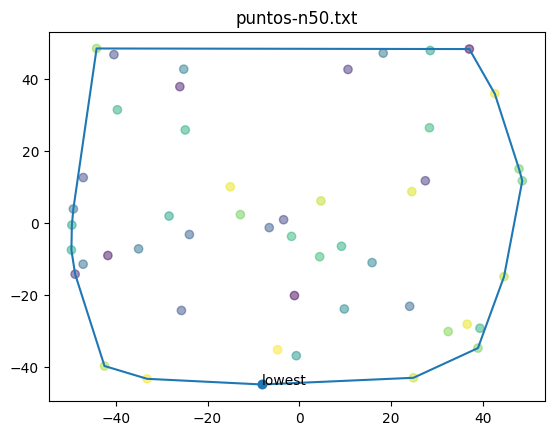

[[32.541, -96.944, 0.0], [81.809, -94.587, 2.73896376448174], [73.981, -93.931, 4.158517009336353], [63.495, -93.456, 6.429159645316252], [69.409, -83.493, 20.04410032534097], [58.511, -82.161, 29.64999168484889], [86.835, -63.966, 31.274360084511876], [88.881, -61.583, 32.113852679010314], [57.561, -80.899, 32.67152378315503], [90.117, -43.83, 42.69161236401844], [65.629, -59.636, 48.43058104086208], [89.872, -14.888, 55.05871650998806], [72.125, -31.166, 58.96123864796903], [82.405, -4.684, 61.609994163335486], [75.995, -5.673, 64.5409437796652], [92.423, 46.057, 67.27838892666942], [95.95, 69.246, 69.11588542121407], [83.424, 39.53, 69.55252022176877], [67.924, -1.842, 69.59212322010474], [65.234, -6.998, 70.02512843757798], [93.859, 76.333, 70.51251865551058], [76.948, 47.305, 72.88903753539871], [88.253, 89.613, 73.37266063410077], [66.94, 22.91, 73.98612256710352], [46.734, -45.179, 74.66736276491376], [79.746, 78.972, 74.97920134864314], [72.967, 61.645, 75.69926357671036], [58.

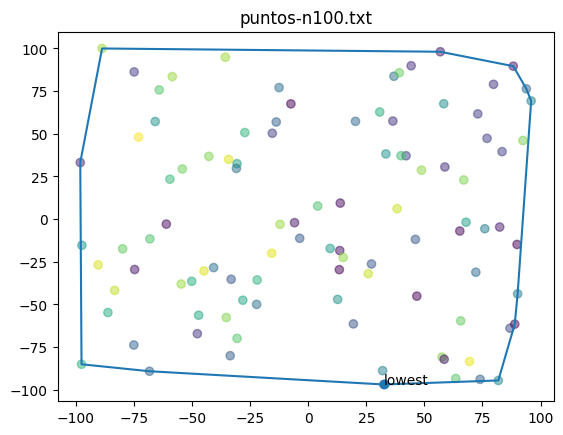

In [ ]:
# Por cada instancia....

instancias = ["puntos-n8.txt", "puntos-n10.txt",
             "puntos-n11.txt", "puntos-n15.txt",
             "puntos-n16.txt", "puntos-n20.txt",
             "puntos-n50.txt", "puntos-n100.txt"]

# 1. Lee los puntos


for file_name in instancias:
  n, puntos = lee_archivo( file_name )

  # 2. Calcula la convex hull
  hull, lowest = find_hull(n, puntos)

  # 3. Y grafica...
  draw_hull(puntos, hull, lowest, file_name)